<a href="https://colab.research.google.com/github/MohamedMourad1/Final-Project-Digital-Pioneers/blob/main/Final_Project_Digital_Pioneers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milestone 1: Data Collection, Exploration, and Preprocessing**


## Load the Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mohamedmouradshafeek","key":"2e0d3e6675e8c1d2a5516ef94e3e085d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 73.8MB/s]


In [ ]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
import pandas as pd
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(data.head(1))

     id gender   age  hypertension  heart_disease ever_married work_type  \
0  9046   Male  67.0             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  


In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

In [ ]:
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


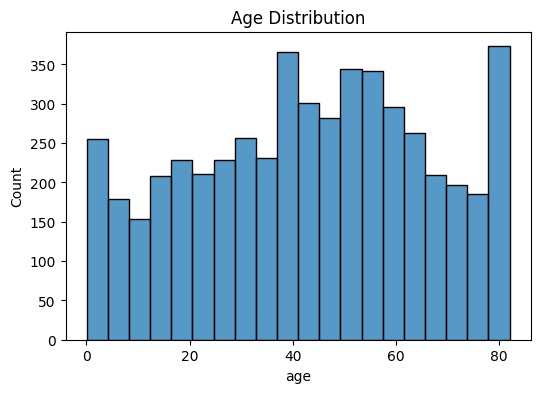

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(x='age', data=data)
plt.title('Age Distribution')
plt.show()

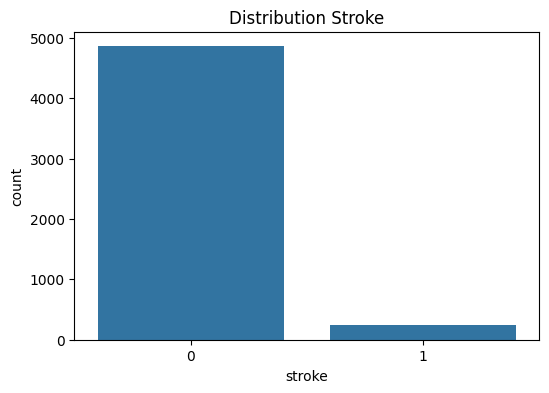

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=data)
plt.title('Distribution Stroke')
plt.show()

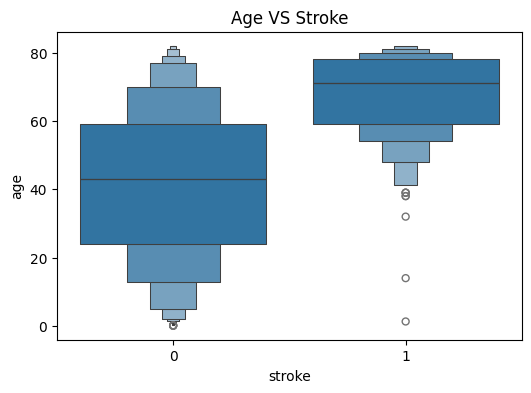

In [ ]:
plt.figure(figsize=(6,4))
sns.boxenplot(x='stroke', y='age', data=data)
plt.title('Age VS Stroke')
plt.show()

In [ ]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<ipython-input-13-afcd7c647c61>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


In [ ]:
data = data.drop('id', axis=1)

In [ ]:
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})
data = pd.get_dummies(data, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
print(data.head())

    age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  67.0             0              1             1             228.69   
1  61.0             0              0             1             202.21   
2  80.0             0              1             1             105.92   
3  49.0             0              0             1             171.23   
4  79.0             1              0             1             174.12   

         bmi  stroke  gender_Male  gender_Other  work_type_Never_worked  \
0  36.600000       1         True         False                   False   
1  28.893237       1        False         False                   False   
2  32.500000       1         True         False                   False   
3  34.400000       1        False         False                   False   
4  24.000000       1        False         False                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    F

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = MinMaxScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data[numerical_cols].head())

        age  avg_glucose_level       bmi
0  0.816895           0.801265  0.301260
1  0.743652           0.679023  0.212981
2  0.975586           0.234512  0.254296
3  0.597168           0.536008  0.276060
4  0.963379           0.549349  0.156930


In [ ]:
print(data.info())

print(data.head ())

# print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   ever_married                    5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   work_type_Never_worked          5110 non-null   bool   
 10  work_type_Private               5110 non-null   bool   
 11  work_type_Self-employed         5110 non-null   bool   
 12  work_type_children              51

In [ ]:
data.to_csv('cleaned_stroke_data.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("cleaned_stroke_data.csv")
print(data.head(1))

        age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.816895             0              1             1           0.801265   

       bmi  stroke  gender_Male  gender_Other  work_type_Never_worked  \
0  0.30126       1         True         False                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                  True                            True   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                  False  


In [ ]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
# data = data.drop('id', axis=1)
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})
# data = pd.get_dummies(data, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
# print(data.info())
print(data.head())

        age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.816895             0              1           NaN           0.801265   
1  0.743652             0              0           NaN           0.679023   
2  0.975586             0              1           NaN           0.234512   
3  0.597168             0              0           NaN           0.536008   
4  0.963379             1              0           NaN           0.549349   

        bmi  stroke  gender_Male  gender_Other  work_type_Never_worked  \
0  0.301260       1         True         False                   False   
1  0.212981       1        False         False                   False   
2  0.254296       1         True         False                   False   
3  0.276060       1        False         False                   False   
4  0.156930       1        False         False                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True   

<ipython-input-20-fbe024f2b294>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.038947
Residence_type_Urban              0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
gender_Other                     -0.003166
smoking_status_never smoked      -0.004129
work_type_Never_worked           -0.014882
work_type_children               -0.083869
ever_married                           NaN
Name: stroke, dtype: float64


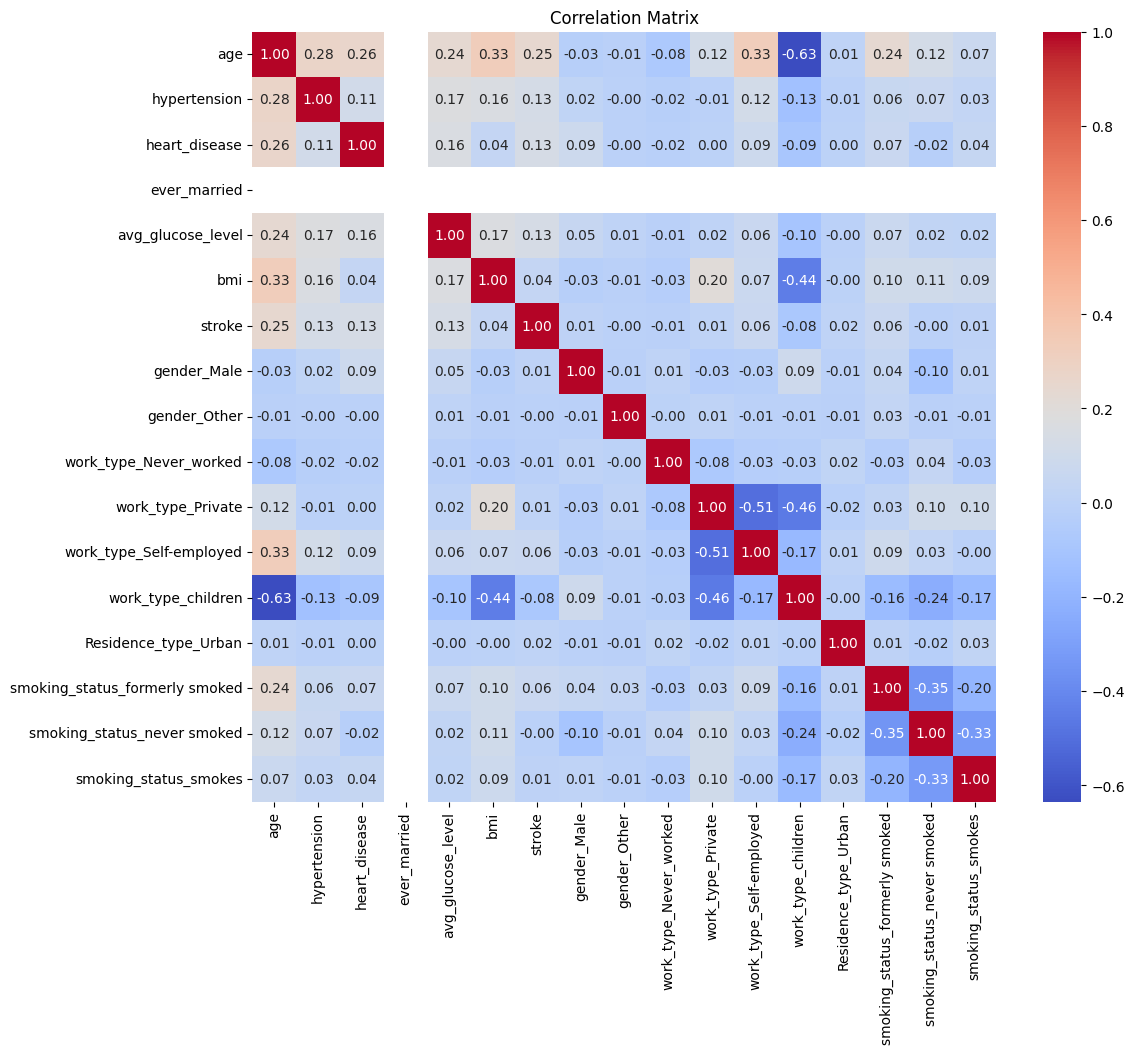

In [ ]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
# sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
print(corr['stroke'].sort_values(ascending=False))

avg_glucose_level                 2.905084e-01
age                               2.459535e-01
bmi                               2.418110e-01
Residence_type_Urban              3.371822e-02
gender_Male                       3.303343e-02
hypertension                      2.552722e-02
work_type_Private                 2.346698e-02
heart_disease                     2.317240e-02
smoking_status_never smoked       2.278238e-02
smoking_status_formerly smoked    2.125666e-02
work_type_Self-employed           1.880049e-02
smoking_status_smokes             1.832186e-02
work_type_children                1.608226e-03
work_type_Never_worked            3.843621e-05
gender_Other                      8.724531e-07
ever_married                      0.000000e+00
dtype: float64


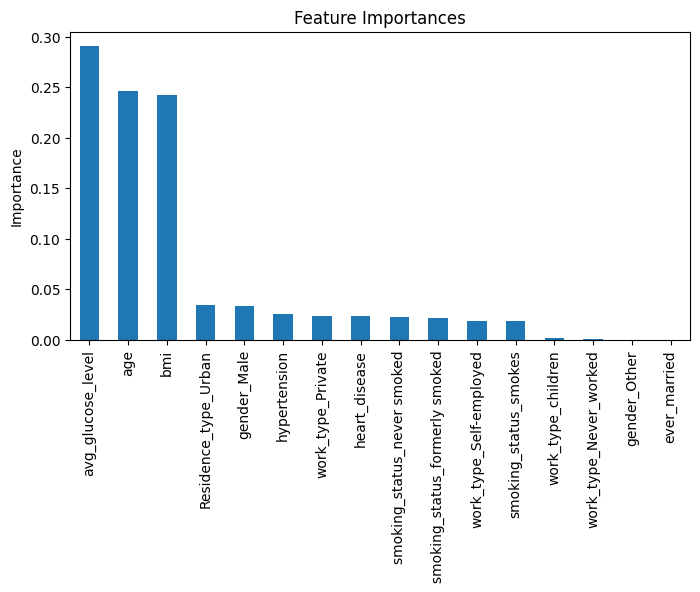

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = data.drop('stroke', axis=1)
y = data['stroke']

# rf = RandomForestClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

plt.figure(figsize=(8, 4))
feature_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.show()

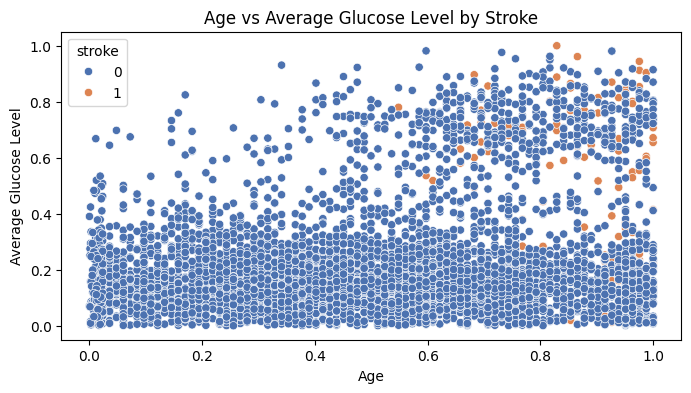

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=data, palette='deep')
plt.title("Age vs Average Glucose Level by Stroke")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.show()

<ipython-input-24-3941f9654b58>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoking_status_smokes', y='stroke', data=data, palette='muted')


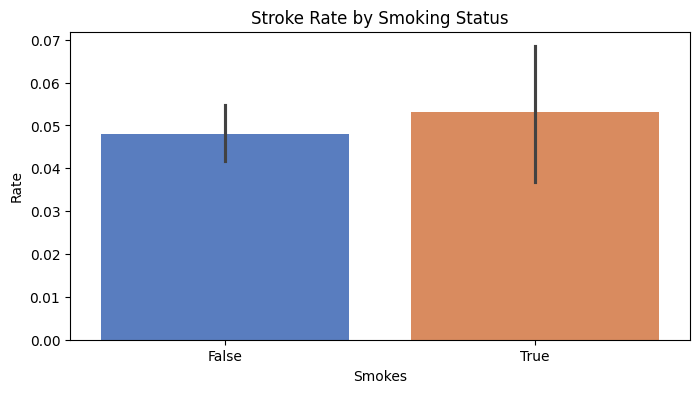

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='smoking_status_smokes', y='stroke', data=data, palette='muted')
plt.title('Stroke Rate by Smoking Status')
plt.xlabel('Smokes')
plt.ylabel('Rate')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data, x='age', y='avg_glucose_level', color='stroke', size='bmi', title='Age vs Average Glucose Level by Stroke')
fig.show()